In [1]:
__author__ = 'Madison Walder, Emily Walla, Stephanie Juneau, Susan Ridgeway'
__version__ = '20200227' # yyyymmdd
__datasets__ = ['MUSE_data']
__keywords__ = []

# Creating Color Images from MUSE Data Cubes
by Madison Walder, Emily Walla, Stephanie Juneau, and Susan Ridgeway

In [2]:
# make necessary imports
import numpy as np

import matplotlib.pyplot as plt

from   astropy.io import fits
from astropy import wcs
import astropy.units as u
import math

#mpdaf used to manipulate the MUSE datacube
from mpdaf.obj import Cube, WCS, WaveCoord, Image
from mpdaf.drs import PixTable
from mpdaf.sdetect import get_emlines

#import RGB color image function from astropy
from astropy.visualization import make_lupton_rgb

# necessary to make matplotlib function well in the jupyter environment
%matplotlib inline

In [3]:
#define function to get color image of input MUSE cube for any band of wavelengths

#wavelengths from Taro et al. (2019)
#g-band = 4800-5830 A
#r-band = 5380–7230 A
#i-band = 6430–8630 A

#wavelength values Stephanie gave
#Red: ~7400 A
#Green: ~6100 A
#Blue: ~5400 A
#Width: 450 pixels * 1.25A per pixel = 562.5A

#function to create an image given a wavelength range
def colorimg(pathway, label, lmin, lmax, elines = False):
    #Inputs:
        #pathway = path to the file
        #label = title of image
        #elines = variable for whether or not you want to include emission lines (set to True if you do)
        #lmin = minimum wavelength in given range
        #lmax = maximum wavelength in given range
    #Returns:
        #color image in wavelength range
    
    #extracting the datacube from the fits file
    file_cube = Cube(pathway)
    
    #opening the fits file, because maybe you'll need it later
    file_fits = fits.open(pathway)
    file_subcube = file_cube.select_lambda(lmin,lmax)
    colorimg = file_subcube.sum(axis=0)
    plt.figure(figsize=(7,7))

    colorimg.plot(colorbar="v",use_wcs=True,scale="log")
    plt.title(label, loc="right", pad=20)
    plt.show()
           
    return colorimg

In [4]:
pathway =  "/dl1/users/mwalder428/NGC_424/MUSE_data/ADP.2017-03-28T14:02:28.787.fits"
label = "ESO-reduced cube"

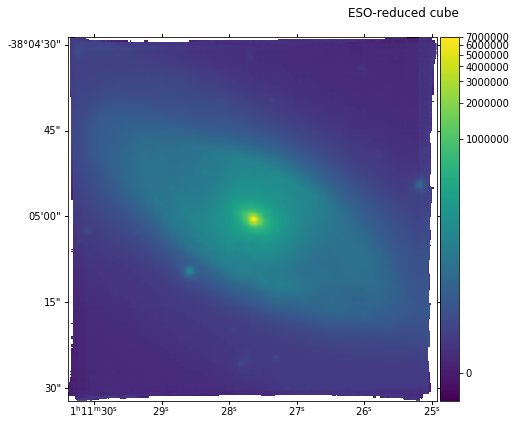

ValueError: too many values to unpack (expected 2)

In [7]:
#creating images with NGC 424 file (using wavelength range from Taro et al)
iband424_subcube, iband424_img = colorimg(pathway, label, 6430, 8630)
rband424_subcube,  rband424_img = colorimg(pathway, label, 5380, 7320)
gband424_subcube, gband424_img = colorimg(pathway, label, 4800, 5830)

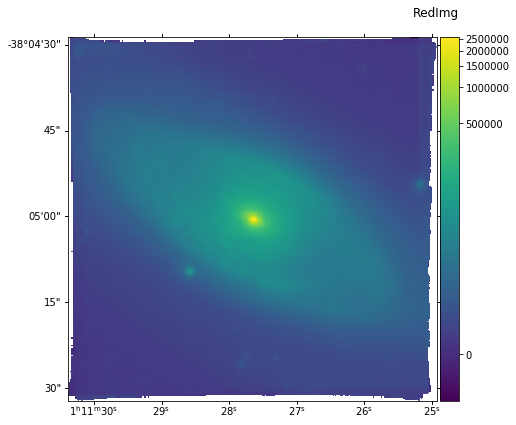

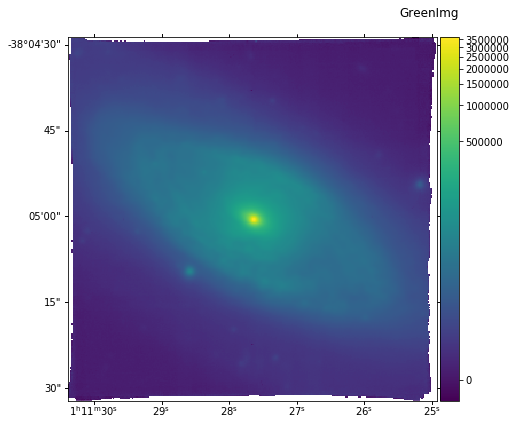

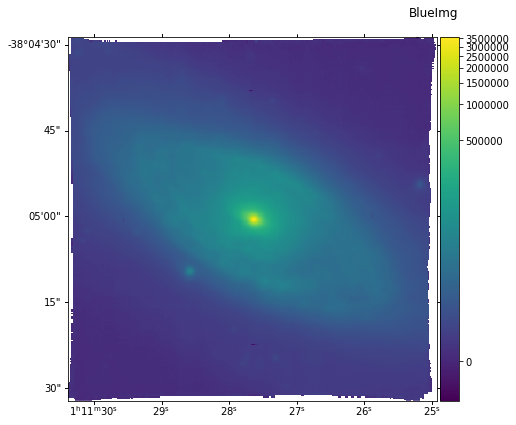

In [5]:
#creating images with  file (using wavelength range from Stephanie)
red_img = colorimg(pathway, "RedImg", 6837.5, 7962.5)
green_img = colorimg(pathway, "GreenImg", 5537.5, 6662.5)
blue_img = colorimg(pathway, "BlueImg", 4837.5, 5962.5)

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


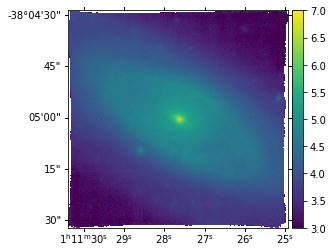

In [6]:
#clone original image and set data of new image as log of the data of the original image
#clone blue
bluelog = blue_img.clone()
bluelog.data = np.log10(blue_img.data)
bluelog.plot(vmin = 3, vmax = 7, colorbar="v",use_wcs=True ,scale="linear")

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


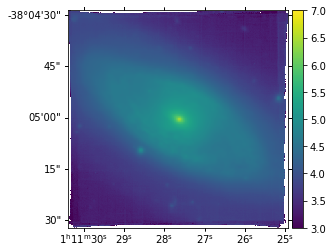

In [7]:
#clone red
redlog = red_img.clone()
redlog.data = np.log10(red_img.data)
redlog.plot(vmin = 3, vmax = 7, colorbar="v",use_wcs=True ,scale="linear")

/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


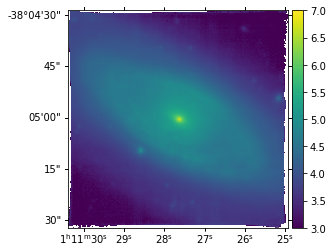

In [8]:
#clone green
greenlog = green_img.clone()
greenlog.data = np.log10(green_img.data)
greenlog.plot(vmin = 3, vmax = 7, colorbar="v",use_wcs=True ,scale="linear")

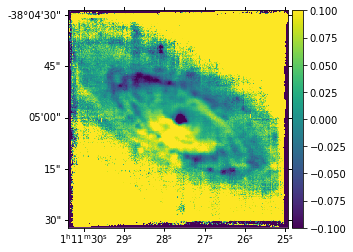

In [9]:
#obtain color difference image by subtracting the clone images from each other and multiplying by -2.5 
#using the usual magnitude difference equation
#blue - red
B_Rdiff = -2.5*(bluelog-redlog)
B_Rdiff.plot(vmin = -0.1, vmax = 0.1, colorbar="v",use_wcs=True ,scale="linear")

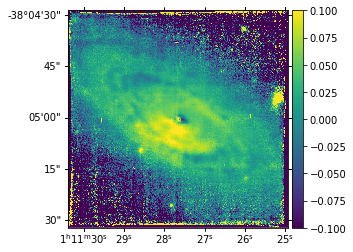

In [10]:
#blue - green 
B_Gdiff = -2.5*(bluelog - greenlog)
B_Gdiff.plot(vmin = -0.1, vmax = 0.1, colorbar="v",use_wcs=True ,scale="linear")

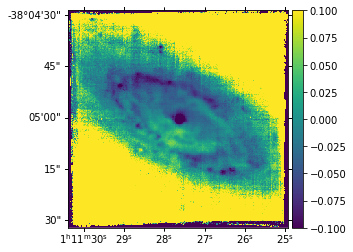

In [11]:
#green - red
G_Rdiff = -2.5*(greenlog - redlog)
G_Rdiff.plot(vmin = -0.1, vmax = 0.1, colorbar="v",use_wcs=True ,scale="linear")

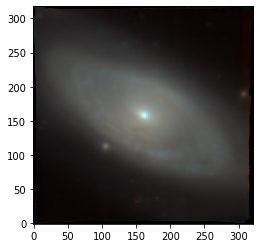

In [26]:
#create RGB image using Lupton et al. (2004)
RGBcolorimg = make_lupton_rgb(red_img.data/1000, green_img.data/1000, blue_img.data/1000, stretch = 50.0)
plt.imshow(RGBcolorimg, origin = "lower")

In [25]:
wcs.WCS.all_pix2world(RGBcolorimg, 0)

AttributeError: 'numpy.ndarray' object has no attribute '_array_converter'

In [21]:
#function found to convert 3d spectra to 2d
def hdr3Dtohdr2D(hdr3D,verbose=True):
    """
    Removing the wavelength component of a hdr, i.e., converting
    the WCS from 3D (lambda,ra,dec) to 2D (ra,dec)

    --- INPUT ---
    hdr3D       The 3D hdr to remove wavelength components from
    verbose     Toggle verbosity

    """
    hdr2D = hdr3D
    for key in hdr2D.keys():
        if '3' in key:
            del hdr2D[key]

    hdr2D['WCSAXES'] = 2
    return hdr2D

AttributeError: 'memoryview' object has no attribute 'keys'